In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
%matplotlib inline
from numpy.linalg import pinv,inv
import matplotlib.image as mpimg
import gc
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('/Users/utkarsharyan/Downloads/California_Houses.csv')
df1.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [4]:
df1.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [5]:
df1.duplicated().sum()

0

In [6]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df1 = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1.sort_values('percent_missing', inplace=True)
missing_value_df1

,column_name,percent_missing
Median_House_Value,Median_House_Value,0.0
Median_Income,Median_Income,0.0
Median_Age,Median_Age,0.0
Tot_Rooms,Tot_Rooms,0.0
Tot_Bedrooms,Tot_Bedrooms,0.0
Population,Population,0.0
Households,Households,0.0
Latitude,Latitude,0.0
Longitude,Longitude,0.0
Distance_to_coast,Distance_to_coast,0.0


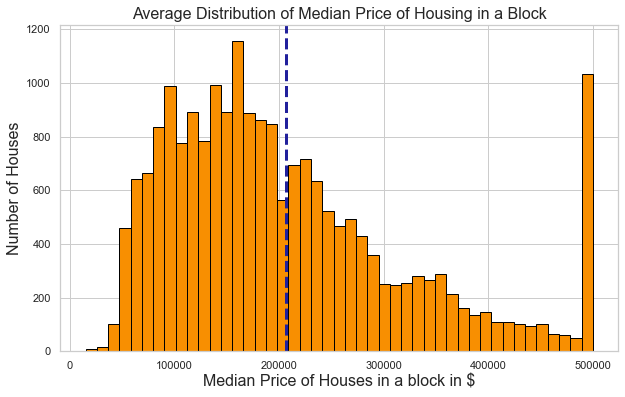

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df1.Median_House_Value, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(df1['Median_House_Value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()
plt.style.use('dark_background')

<AxesSubplot:>

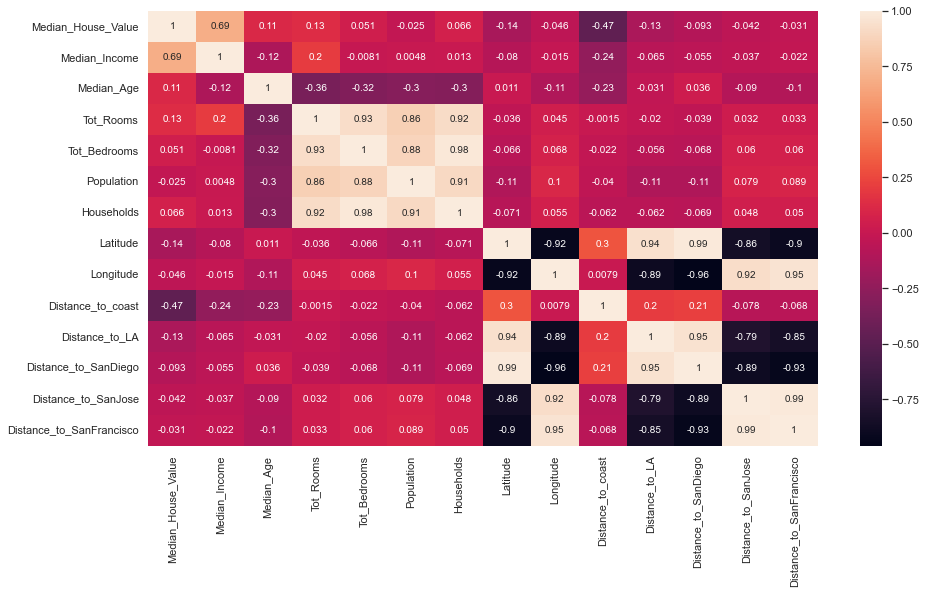

In [6]:
df1=df1[['Median_House_Value','Median_Income','Median_Age','Tot_Rooms','Tot_Bedrooms', 'Population',
       'Households', 'Latitude','Longitude','Distance_to_coast','Distance_to_LA','Distance_to_SanDiego',
         'Distance_to_SanJose','Distance_to_SanFrancisco']]
fig = plt.figure(figsize =(15,8), label = 'Correlation')
sns.heatmap(df1.corr(),annot= True)

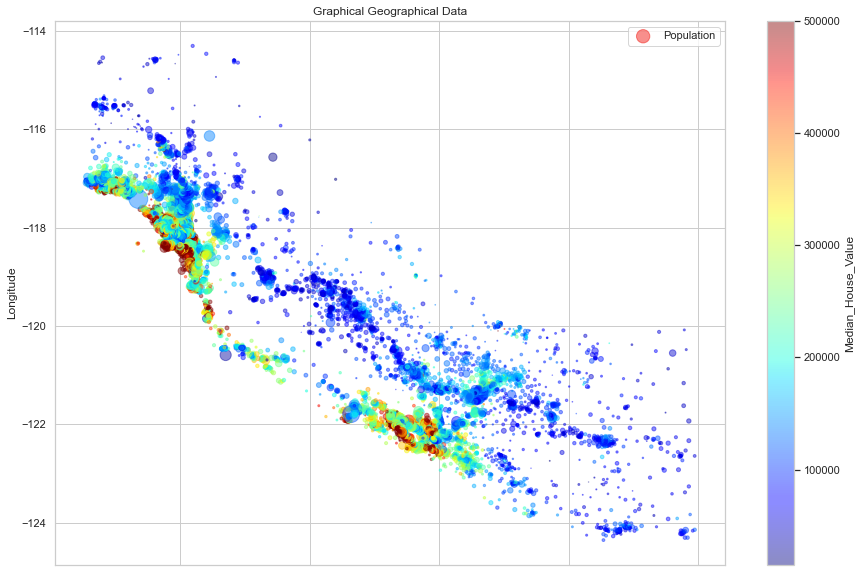

In [7]:
df1.plot(kind = 'scatter',x= 'Latitude', y='Longitude', alpha= 0.45,
        s=df1['Population']/100,c= 'Median_House_Value', cmap = 'jet',
        label='Population',title ='Graphical Geographical Data',figsize= (15,10));

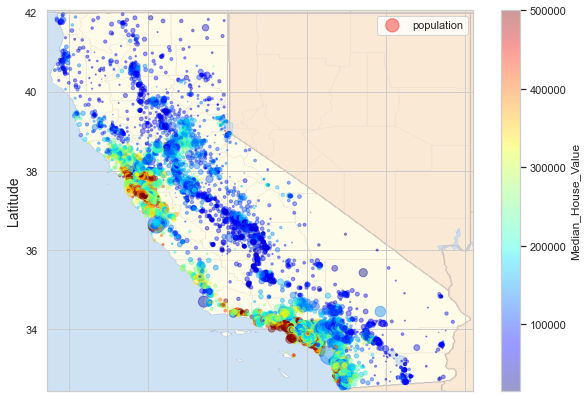

In [25]:
california_img=mpimg.imread('/Users/utkarsharyan/Downloads/california.png')

#df1.plot(kind = 'scatter',x= 'Latitude', y='Longitude', alpha= 0.4,
 #       s=df1['Population']/100,c= 'Median_House_Value', cmap=plt.get_cmap('jet'),
  #      label='Population',title ='Graphical Geographical Data',figsize= (15,10),colorbar=True);

df1.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
                s=df1['Population']/100, label='population', figsize=(10,7),
                c='Median_House_Value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

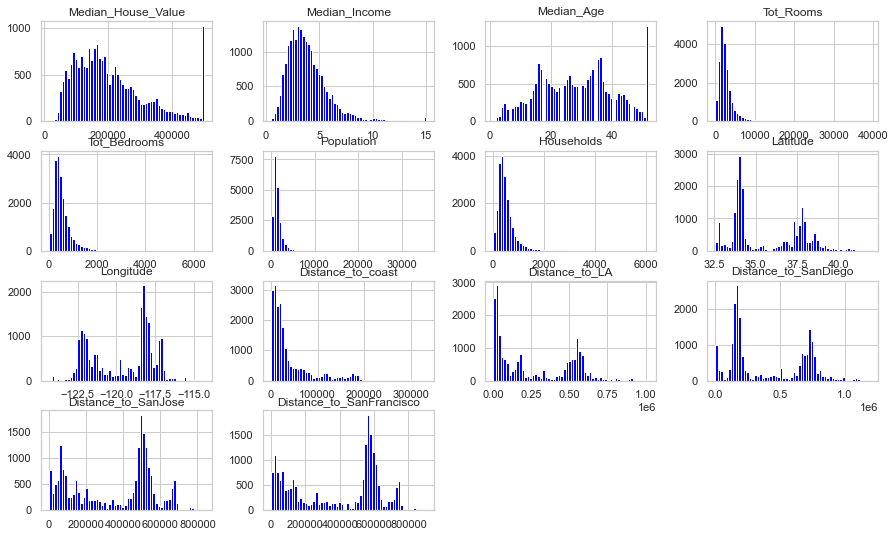

In [12]:
df1.hist(bins=60, figsize=(15,9),color='blue')
plt.show()

In [13]:
def snsPairGrid(df):
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) 
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) 
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) 
    plt.tight_layout()

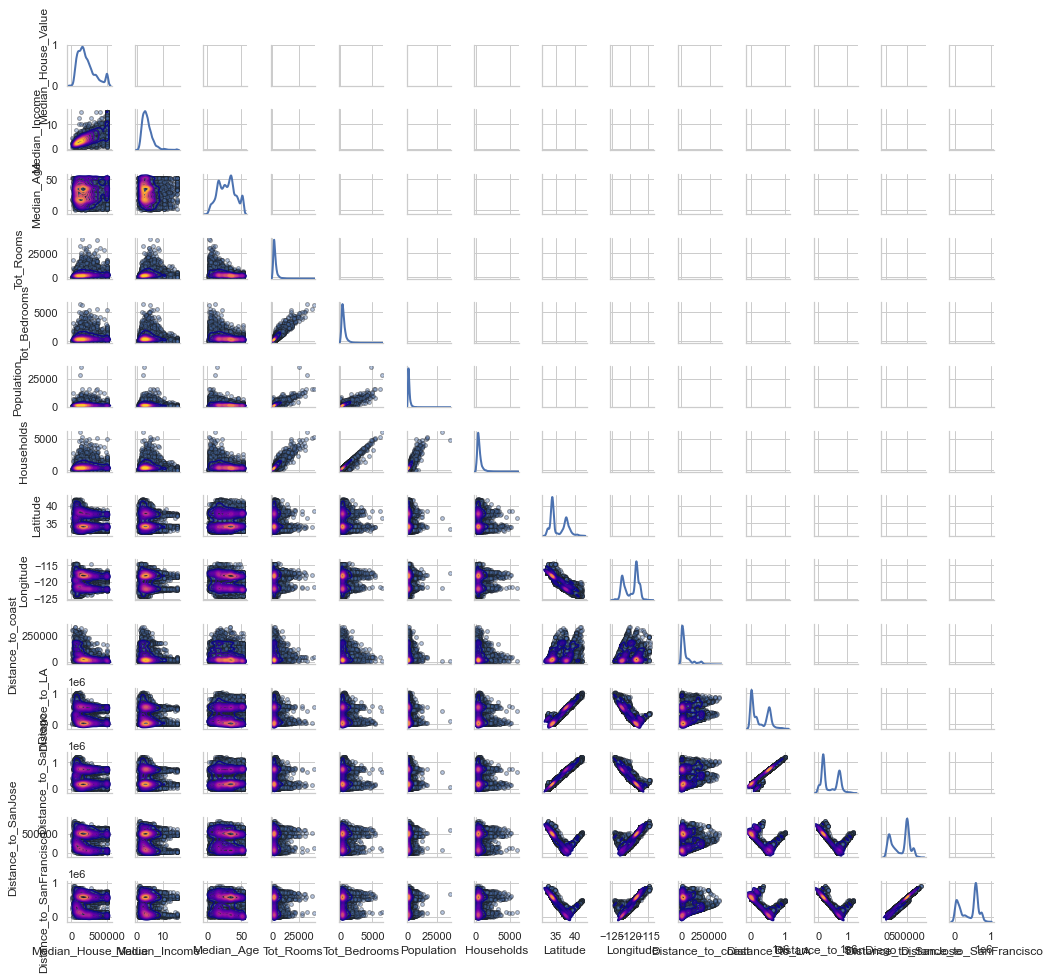

In [14]:
lt = ['Median_House_Value','Median_Income','Median_Age','Tot_Rooms','Tot_Bedrooms', 'Population',
       'Households', 'Latitude','Longitude','Distance_to_coast','Distance_to_LA','Distance_to_SanDiego',
         'Distance_to_SanJose','Distance_to_SanFrancisco']
snsPairGrid(df1[lt]) 

##### Linear Regression

<AxesSubplot:>

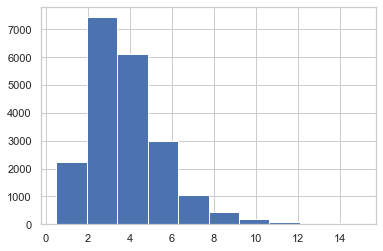

In [47]:
df1["Median_Income"].hist()

In [12]:
df1["Income_shrt"] = pd.cut(df1["Median_Income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

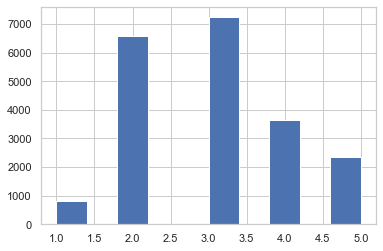

In [48]:
df1["Income_shrt"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1["Income_shrt"]):
    strat_train_set = df1.loc[train_index]
    strat_test_set = df1.loc[test_index]

In [15]:
strat_test_set["Income_shrt"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: Income_shrt, dtype: float64

In [16]:
df1["Income_shrt"].value_counts() / len(df1)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: Income_shrt, dtype: float64

In [17]:
def Income_shrt_proportions(data):
    return data["Income_shrt"].value_counts() / len(data)

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Income_shrt_proportions(df1),
    "Stratified": Income_shrt_proportions(strat_test_set),
    "Random": Income_shrt_proportions(test_set)}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Income_shrt", axis=1, inplace=True)

In [19]:
df2 = strat_train_set.copy()

In [20]:
df3 = strat_test_set.copy()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        16512 non-null  float64
 1   Median_Income             16512 non-null  float64
 2   Median_Age                16512 non-null  int64  
 3   Tot_Rooms                 16512 non-null  int64  
 4   Tot_Bedrooms              16512 non-null  int64  
 5   Population                16512 non-null  int64  
 6   Households                16512 non-null  int64  
 7   Latitude                  16512 non-null  float64
 8   Longitude                 16512 non-null  float64
 9   Distance_to_coast         16512 non-null  float64
 10  Distance_to_LA            16512 non-null  float64
 11  Distance_to_SanDiego      16512 non-null  float64
 12  Distance_to_SanJose       16512 non-null  float64
 13  Distance_to_SanFrancisco  16512 non-null  float64
dtypes:

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        4128 non-null   float64
 1   Median_Income             4128 non-null   float64
 2   Median_Age                4128 non-null   int64  
 3   Tot_Rooms                 4128 non-null   int64  
 4   Tot_Bedrooms              4128 non-null   int64  
 5   Population                4128 non-null   int64  
 6   Households                4128 non-null   int64  
 7   Latitude                  4128 non-null   float64
 8   Longitude                 4128 non-null   float64
 9   Distance_to_coast         4128 non-null   float64
 10  Distance_to_LA            4128 non-null   float64
 11  Distance_to_SanDiego      4128 non-null   float64
 12  Distance_to_SanJose       4128 non-null   float64
 13  Distance_to_SanFrancisco  4128 non-null   float64
dtypes: fl

In [23]:
x_train = df2.drop('Median_House_Value',axis=1)

In [24]:
y_train = df2.Median_House_Value

In [25]:
x_train.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
12655,2.1736,29,3873,797,2237,706,38.52,-121.46,50599.144593,574274.925963,753124.681591,137078.744622,118723.941210
15502,6.3373,7,5320,855,2015,768,33.09,-117.23,8352.411462,142364.339312,42110.615570,634096.090137,702125.436423
2908,2.8750,44,1618,310,667,300,35.37,-119.04,117772.799313,163609.893613,342147.509042,336190.704566,403888.983324
14053,2.2264,24,1877,519,898,483,32.75,-117.13,8542.074776,177916.946814,4792.830835,669117.781727,737103.754121
20496,4.4964,27,3536,646,1837,580,34.28,-118.70,28788.098950,49030.492265,224975.060180,445290.745173,513253.823084


In [26]:
y_train.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: Median_House_Value, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.score(x_train,y_train)

0.6456106008010883

In [39]:
x_test = df3.drop('Median_House_Value',axis=1)

In [40]:
model.predict(x_test)

array([426692.79292141, 299423.9539328 , 249160.77168534, ...,
       318781.63922437, 266348.06055534, 246735.70650295])

In [41]:
df3.Median_House_Value

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: Median_House_Value, Length: 4128, dtype: float64

In [42]:
model.score(x_test,df3.Median_House_Value)

0.6502621033159541

##### Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model1 = RandomForestRegressor()

In [56]:
model1.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
model1.score(x_train,y_train)

0.9767213125415506

In [58]:
model1.predict(x_test)

array([491201.75, 192575.01, 197936.  , ..., 383810.11, 326048.1 ,
       222146.  ])

In [59]:
df3.Median_House_Value

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: Median_House_Value, Length: 4128, dtype: float64

In [60]:
model1.score(x_test,df3.Median_House_Value)

0.8407034316144049

##### Bayesian Ridge

In [27]:
from sklearn.linear_model import BayesianRidge

In [28]:
model2 = BayesianRidge(compute_score=True)

In [29]:
model2.fit(x_train,y_train)

BayesianRidge(compute_score=True)

In [30]:
model2.score(x_train,y_train)

0.6456067496983908

In [33]:
model2.predict(x_test)

array([426678.19549667, 298674.9534981 , 249173.63022862, ...,
       318291.80683285, 266467.16777399, 246715.24821991])

In [34]:
model2.score(x_test,df3.Median_House_Value)

0.6502369942420966

##### Plotting

Text(0.5, 0, 'Iterations')

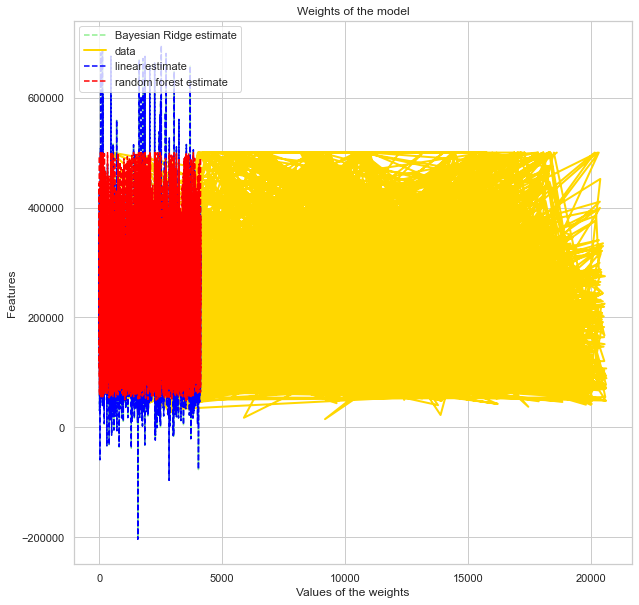

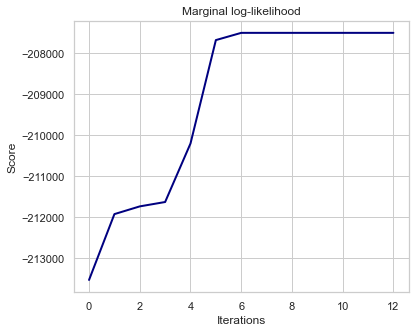

In [61]:
lw = 2
plt.figure(figsize=(10, 10))
plt.title("Weights of the model")
plt.plot(model2.predict(x_test), color="lightgreen", linestyle="--", label="Bayesian Ridge estimate")
plt.plot(df3.Median_House_Value, color="gold", linewidth=lw, label="data")
plt.plot(model.predict(x_test), color="blue", linestyle="--", label="linear estimate")
plt.plot(model1.predict(x_test), color="red", linestyle="--", label="random forest estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(model2.scores_, color="navy", linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [7]:
df6 = pd.read_csv('/Users/utkarsharyan/Downloads/covid_vaccine_statewise.csv')
df6.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
df6.drop('Updated On','Second Dose Administered',axis=1)